<a href="https://colab.research.google.com/github/indra622/tutorials/blob/master/Multi_AI_Agent_Study/Part3_Ch1_01_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install langgraph python-dotenv langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [4]:
from dotenv import load_dotenv

load_dotenv()



True

In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
  counter: int
  alphabet: list[str]


graph_builder = StateGraph(State)

In [9]:
from typing import Annotated

import operator

def node_a(state: State):
  state['counter'] += 1
  state['alphabet'] = ["Hello"]
  return state

graph_builder = StateGraph(State)

graph_builder.add_node('chatbot', node_a)

graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

In [10]:
graph = graph_builder.compile()

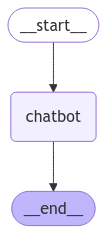

In [12]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [13]:
initial_state = {
    "counter": 0,
    "alphabet": []
}

state = initial_state

for _ in range(3):
  state = graph.invoke(state)
  print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello']}
{'counter': 3, 'alphabet': ['Hello']}


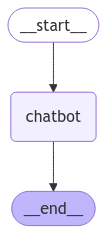

In [24]:
class State(TypedDict):
  counter: int
  alphabet: Annotated[list[str], operator.add]

def node_a(state: State):
  state['counter'] += 1
  state['alphabet'] = ["Hello"]
  return state

graph_builder = StateGraph(State)

graph_builder.add_node('chatbot', node_a)

graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)
graph = graph_builder.compile()

from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [25]:
initial_state = {
    "counter": 0,
    "alphabet": []
}

state = initial_state
for _ in range(3):
  state = graph.invoke(state)
  print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello', 'Hello']}
{'counter': 3, 'alphabet': ['Hello', 'Hello', 'Hello']}


In [27]:
from langchain_openai import ChatOpenAI

from langgraph.graph.message import add_messages

class State(TypedDict):
  messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = ChatOpenAI(model='gpt-4o-mini')

def chatbot(state: State):
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()


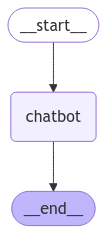

In [28]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
while True:
  user_input = input('User: ')
  if user_input.lower() in ['quit', 'exit', 'q']:
    print("Goodbye!!")
    break
  for event in graph.stream({"messages": ("user", user_input)}):
    for value in event.values():
      print("Assistant:", value["messages"][-1].content)
      print(value)

User: hello? what's your name?
Assistant: Hello! I'm an AI language model and don't have a personal name, but you can call me Assistant. How can I help you today?
{'messages': [AIMessage(content="Hello! I'm an AI language model and don't have a personal name, but you can call me Assistant. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-af5ebb3b-4c79-492d-9b5f-588937b4c5fa-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 

In [32]:
from langgraph.graph import MessagesState

graph_builder = StateGraph(MessagesState)

def chatbot(state: State):
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node('chatbot', chatbot)
graph_builder.set_entry_point('chatbot')
graph_builder.set_finish_point('chatbot')
graph = graph_builder.compile()

In [33]:
while True:
  user_input = input('User: ')
  if user_input.lower() in ['quit', 'exit', 'q']:
    print("Goodbye!!")
    break
  for event in graph.stream({"messages": ("user", user_input)}):
    for value in event.values():
      print("Assistant:", value["messages"][-1].content)
      print(value)

User: hello, what's your type of model?
Assistant: Hello! I'm based on the GPT-3 architecture, which is a type of language model developed by OpenAI. My main function is to understand and generate human-like text based on the input I receive. If you have any specific questions or topics you'd like to discuss, feel free to ask!
{'messages': [AIMessage(content="Hello! I'm based on the GPT-3 architecture, which is a type of language model developed by OpenAI. My main function is to understand and generate human-like text based on the input I receive. If you have any specific questions or topics you'd like to discuss, feel free to ask!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 15, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 

In [35]:



class State(MessagesState):
  counter: int

graph_builder = StateGraph(State)

def chatbot(state: State):
  state['counter'] = state.get('counter', 0) + 1
  return {"messages": [llm.invoke(state['messages'])], 'counter': state['counter']}

graph_builder.add_node('chatbot', chatbot)
graph_builder.set_entry_point('chatbot')
graph_builder.set_finish_point('chatbot')

graph = graph_builder.compile()

In [36]:
from langchain_core.messages import HumanMessage

initial_state = {
    "messages": [HumanMessage(content="Hello!")],
    "counter":0
}

result = graph.invoke(initial_state)

print(f"Final state: {result}")

Final state: {'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='beb57650-8c8a-4b49-bb48-0411a7670669'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-c783908b-8dce-432a-9701-307cc9b690dd-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'counter': 1}


In [37]:
state = initial_state

for _ in range(3):
  state = graph.invoke(state)
  print(f"Counter: {state['counter']}")
  print(f"Last message: {state['messages'][-1].content}")
  print("---")

Counter: 1
Last message: Hello! How can I assist you today?
---
Counter: 2
Last message: Hello! How can I assist you today?
---
Counter: 3
Last message: Hello! How can I assist you today?
---
